In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#reading csv file
nyc_df = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

#find the variable data types
nyc_df = nyc_df.dropna() #drop any null values
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# First Chart (Change after creation)

In [3]:
#average & median price in Boroughs
n_type = nyc_df.groupby(['neighbourhood_group'])

b_mean = round(n_type['price'].mean(),2)
b_med = n_type['price'].median()

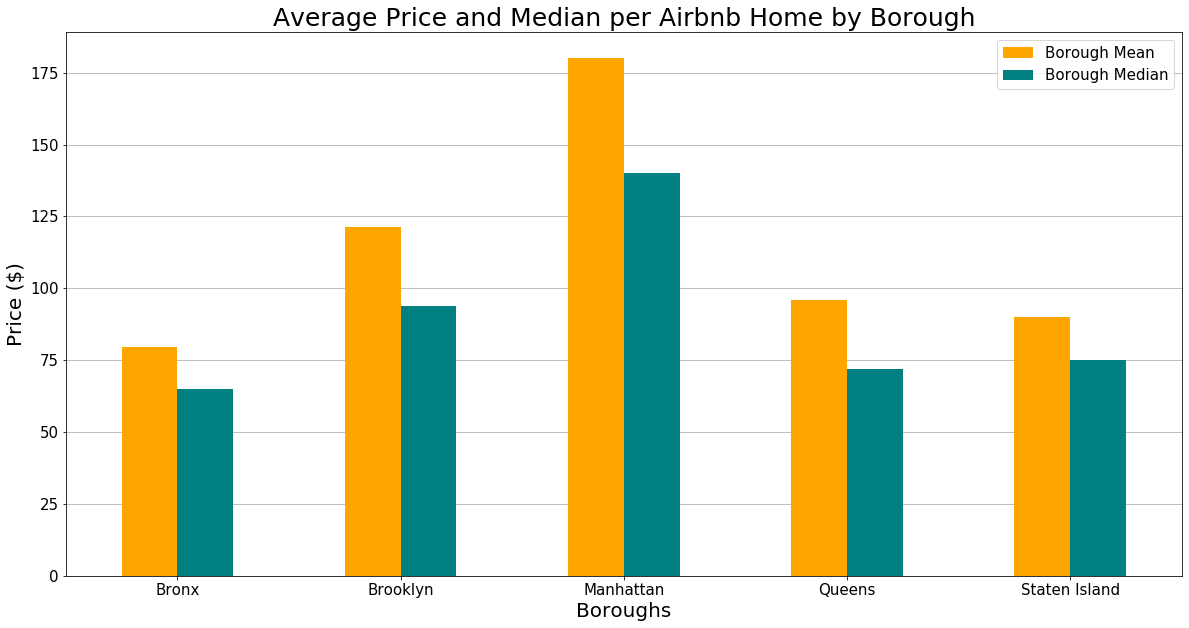

In [4]:
#Create dataframe
borough = pd.DataFrame({'Borough Mean':b_mean,'Borough Median':b_med})

#Double Bar Plot
borough.plot(kind="bar",color=['orange','teal'],figsize=(20,10),zorder=3)

#Chart Formatting
plt.title('Average Price and Median per Airbnb Home by Borough',size=25)
plt.grid(axis='y',zorder=0)
plt.xlabel('Boroughs', size=20)
plt.ylabel('Price ($)', size=20)
plt.xticks(rotation='horizontal',size=15)
plt.yticks(size=15)
plt.legend(prop = {'size':15})

#Save as .png
plt.savefig('Airbnb Data/avg_med_per_borough.png')
plt.show()

In [5]:
#Borough Dataframe
borough

,Borough Mean,Borough Median
neighbourhood_group,,
Bronx,79.56,65
Brooklyn,121.46,94
Manhattan,180.07,140
Queens,95.78,72
Staten Island,89.96,75


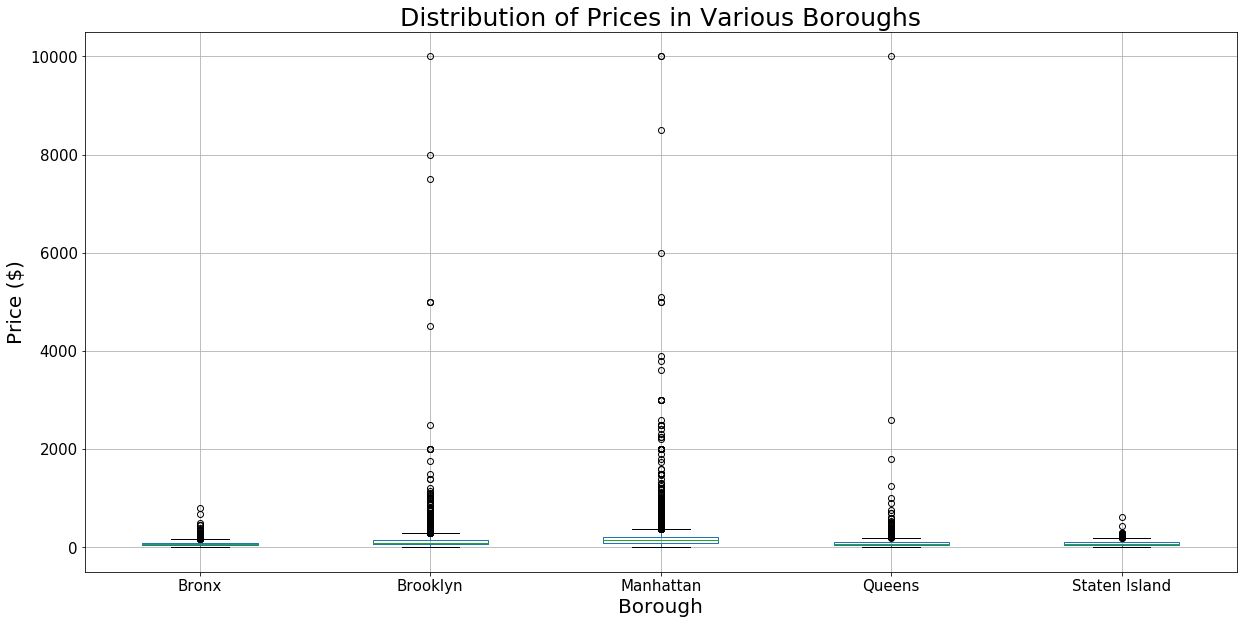

In [6]:
#Distribution of Boroughs
bur_group = nyc_df[['neighbourhood_group','price']]

bur_group.boxplot('price',by='neighbourhood_group',figsize=(20,10))

#Formatting Plot
plt.title('Distribution of Prices in Various Boroughs',size=25)
plt.ylabel('Price ($)', size = 20)
plt.xlabel('Borough', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('');

#save as .png
plt.savefig('Airbnb Data/dist_bo r.png')
plt.show()

In [7]:
#To accept or reject the Null Hypothesis
Bronx_hood =  nyc_df[nyc_df["neighbourhood_group"] == "Bronx"]["price"]
Brooklyn_hood = nyc_df[nyc_df["neighbourhood_group"] == "Brooklyn"]["price"]
Manhaton_hood =nyc_df[nyc_df["neighbourhood_group"] == "Manhattan"]["price"]
Queens_hood= nyc_df[nyc_df["neighbourhood_group"] == "Queens"]["price"]
Staten_hood= nyc_df[nyc_df["neighbourhood_group"] == "Staten Island"]["price"]

#find the critical value and p-value
stats.f_oneway(Bronx_hood, Brooklyn_hood, Manhaton_hood, Queens_hood, Staten_hood)

F_onewayResult(statistic=299.1170643325002, pvalue=7.558354126272287e-254)

In [8]:
#average & median price in Manhattan
manhattan = pd.DataFrame(nyc_df.loc[nyc_df['neighbourhood_group']=='Manhattan',:])

m_group = manhattan.groupby(['neighbourhood'])

man_mean = round(m_group['price'].mean(),2)
man_median = m_group['price'].median()

#Create Dataframe
mm_df = pd.DataFrame({'Manhattan Mean':man_mean,'Manhattan Median':man_median})

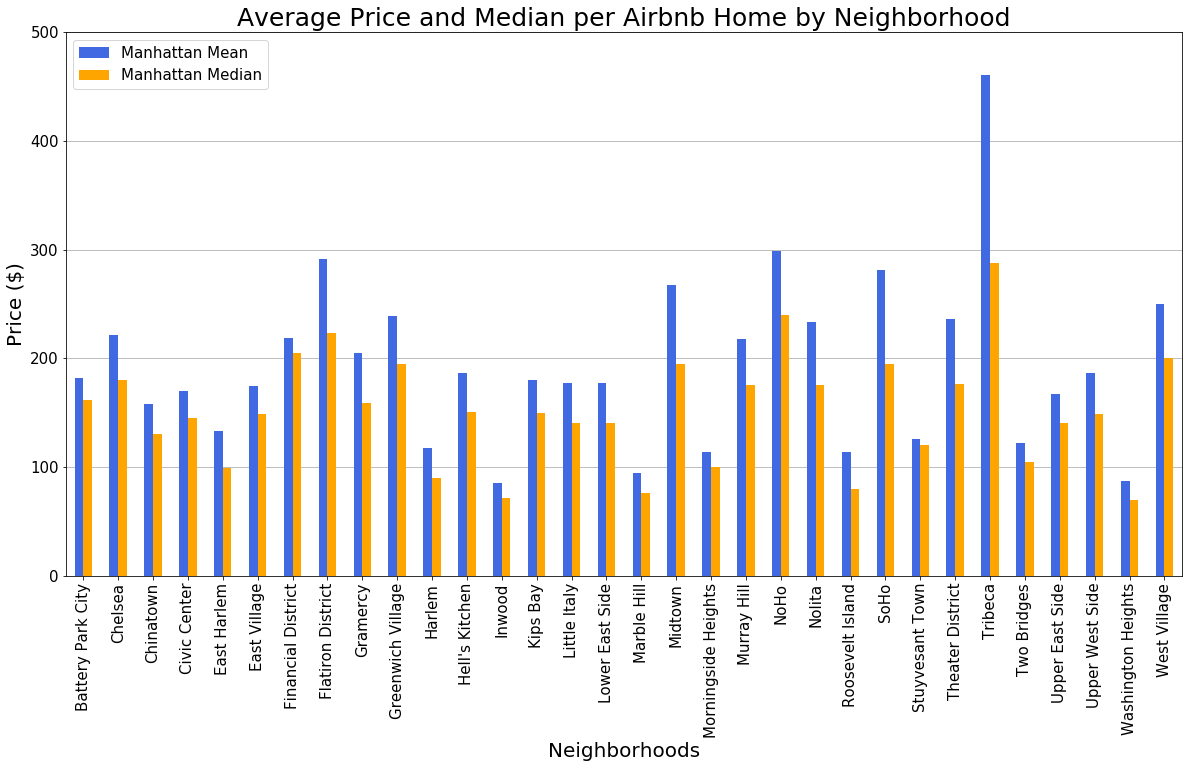

In [9]:
#Plot the chart
mm_df.plot(kind="bar",color = ['royalblue','orange'],figsize=(20,10),zorder=3)

#Chart formatting
plt.legend(loc='best',prop = {'size':15})
plt.title('Average Price and Median per Airbnb Home by Neighborhood',size=25)
plt.xlabel('Neighborhoods', size=20)
plt.ylabel('Price ($)', size=20)
plt.grid(axis='y')
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.ylim(0,500)

#save as .png
plt.savefig('Airbnb Data/avg_med_manhattan.png')


In [10]:
#show dataframe
mm_df.head()

,Manhattan Mean,Manhattan Median
neighbourhood,,
Battery Park City,182.19,161.5
Chelsea,221.79,180.0
Chinatown,157.46,130.0
Civic Center,169.83,145.0
East Harlem,132.75,99.0


                      price
room_type                  
Entire home/apt  196.315929
Private room      83.985272
Shared room       63.213948


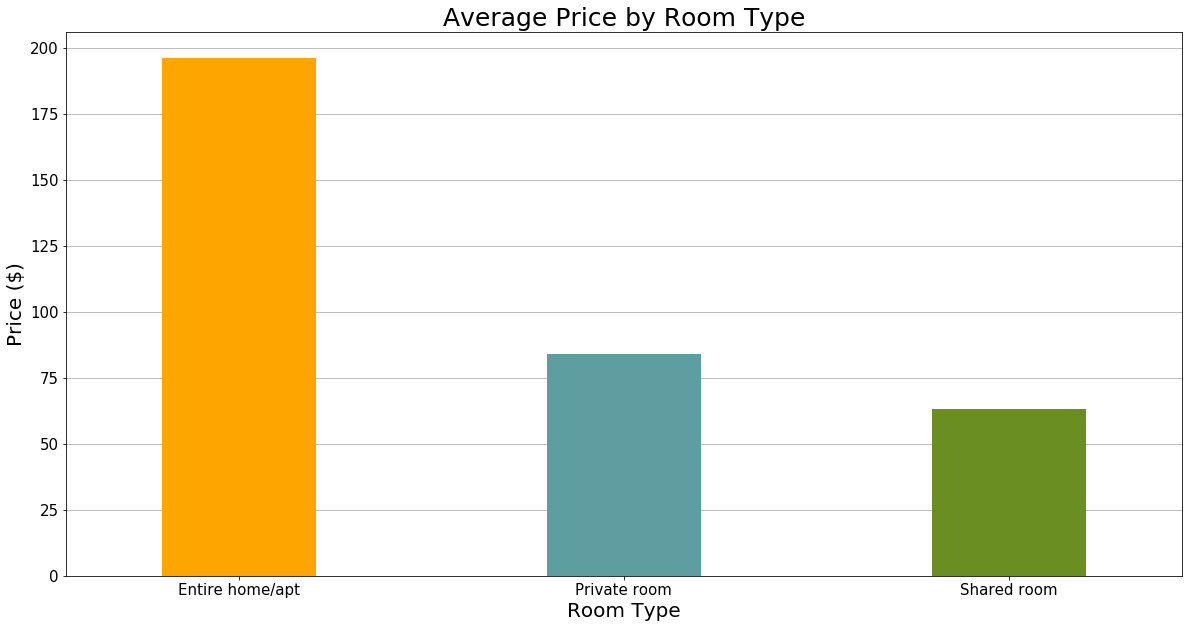

In [11]:
#Groupby Room Types
rm_type = nyc_df.groupby(['room_type'])
room_mean = pd.DataFrame(rm_type['price'].mean())
print(room_mean)

#plot bar chart
room_mean.plot(kind="bar",figsize=(20,10), color=('orange','cadetblue','olivedrab'),align='center',
              legend=None,zorder=3,width=.4)

#Chart formatting
plt.title('Average Price by Room Type',size = 25)
plt.xlabel('Room Type',size=20)
plt.ylabel('Price ($)', size=20)
plt.yticks(size=15)
plt.xticks(rotation='horizontal',size=15)
plt.grid(axis='y',zorder=0)
#Save as .png
plt.savefig('Airbnb Data/avg_price_roomtype.png')

plt.show()


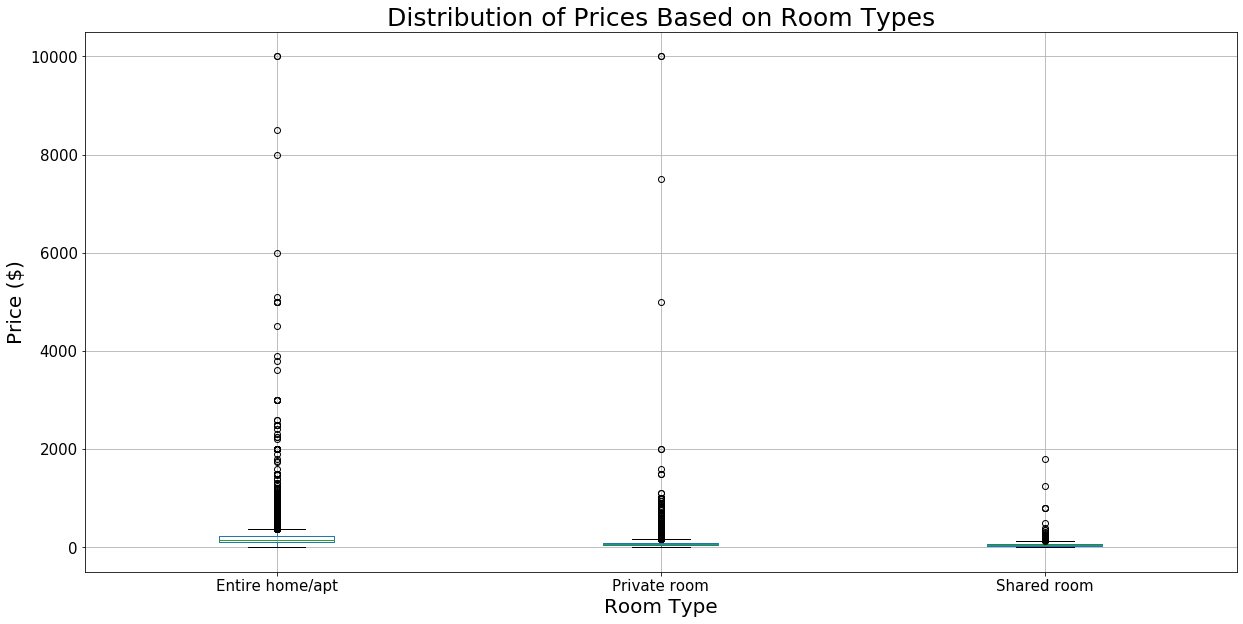

In [12]:
room_group = nyc_df[['room_type','price']]
#Create Boxplot for room_types
room_group.boxplot('price',by='room_type',figsize=(20,10))

#Formatting Plot
plt.title('Distribution of Prices Based on Room Types',size=25)
plt.ylabel('Price ($)', size = 20)
plt.xlabel('Room Type', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.suptitle('');

#save as .png
plt.savefig('Airbnb Data/dis_roomtypes.png')

In [13]:
#To accept or reject the Null Hypothesis
house_price = nyc_df[nyc_df["room_type"] == "Entire home/apt"]["price"]
private_price = nyc_df[nyc_df["room_type"] == "Private room"]["price"]
shared_price = nyc_df[nyc_df["room_type"] == "Shared room"]["price"]

#find the critical value and p-value
stats.f_oneway(house_price, private_price, shared_price)

F_onewayResult(statistic=1750.3004939558498, pvalue=0.0)

In [14]:
#Create bins for pricing groups
price_category = ["Low Price", "Medium Price", "High Price"]
airbnb_price = [0,69,106,175]
#define 
rm_bin = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

rm_bin = rm_bin.dropna()
rm_home = rm_bin
rm_home['bin'] = pd.qcut(rm_home.price,3,labels=price_category)

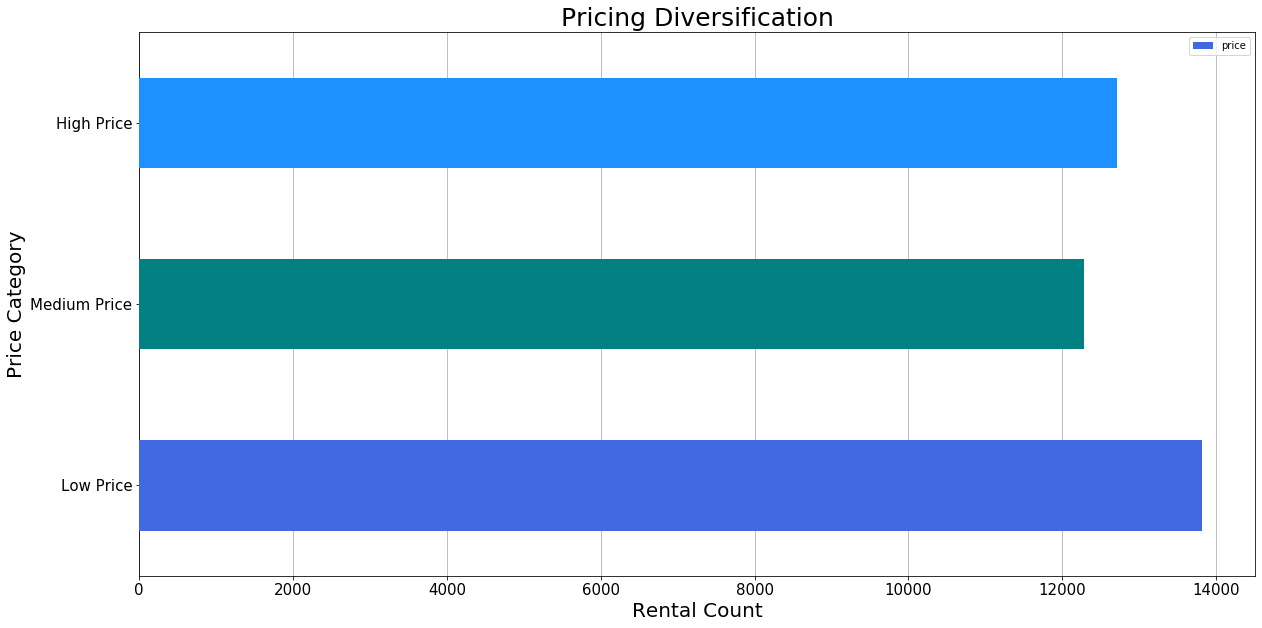

In [15]:
#Groupby bins
home_group = rm_home.groupby(['bin'])
home_count = pd.DataFrame(home_group['price'].count())

#Plot H-Bar
home_count.plot(kind="barh",color=('royalblue','teal','dodgerblue'),figsize=(20,10),zorder=3);

#Formatting H-Bar
plt.title('Pricing Diversification',size=25)
plt.ylabel('Price Category',size=20)
plt.xlabel('Rental Count',size=20)
plt.grid(axis='x')
plt.yticks(size=15);
plt.xticks(size=15);

#save as .png
plt.savefig('Airbnb Data/price_diverse.png')
plt.show()

In [16]:
#Create data without homes
rm_bin_drop = rm_bin[rm_bin.room_type !='Entire home/apt']
rm_bin_drop.head(2)

rm_bin_drop['bin'] = pd.qcut(rm_bin_drop.price,3,labels=price_category)

bin_group_drop = rm_bin_drop.groupby(['bin'])
bin_count_drop = pd.DataFrame(bin_group_drop['price'].count())


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


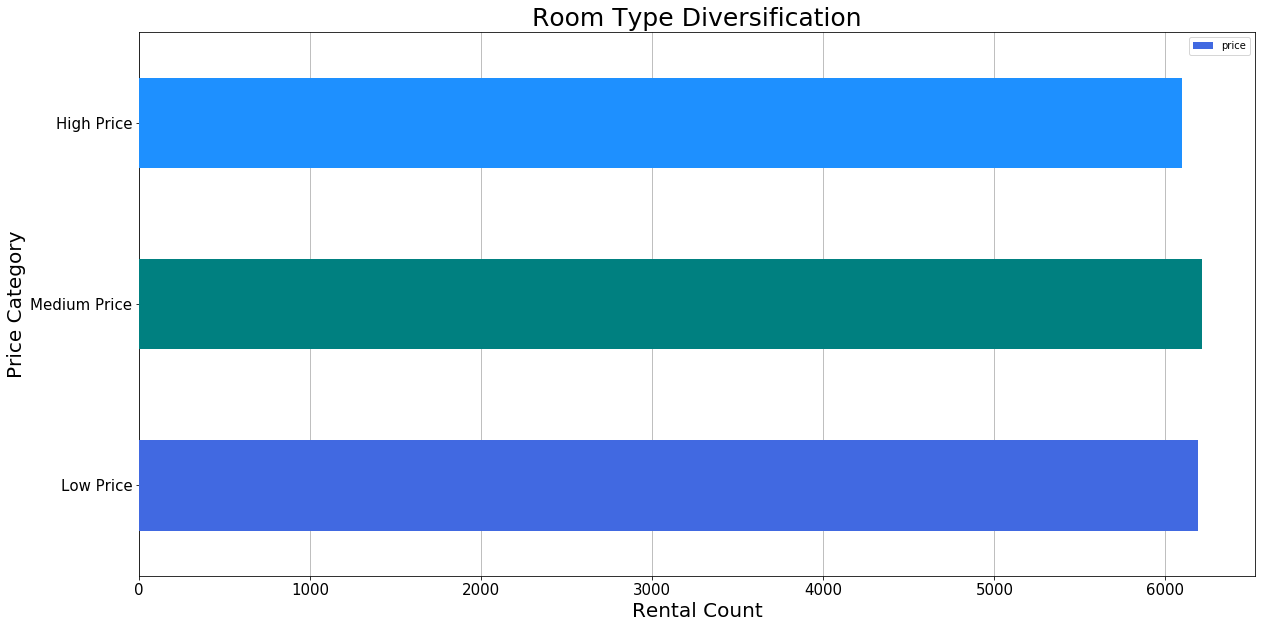

In [17]:
#Create horizontal bar graph
bin_count_drop.plot(kind="barh",color=('royalblue','teal','dodgerblue'),figsize=(20,10),zorder=3);

#Formatting the H-Bar
plt.title('Room Type Diversification',size=25)
plt.ylabel('Price Category',size=20)
plt.xlabel('Rental Count',size=20)
plt.grid(axis='x')
plt.yticks(size=15);
plt.xticks(size=15);

#save as .png
plt.savefig('Airbnb Data/price_room.png')
plt.show()